In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import heapq

In [10]:
df = pd.read_csv("car_data/carr-Feb-18-6625.csv")
df.head(3)

,Unnamed: 0,brand1,brand2,frq
0,1,Jeep,Subaru,13
1,2,Jeep,Dodge,270
2,3,Jeep,Tesla,42


In [43]:
def k_closest(df, brand, k):
    edges_from = df[df["brand1"] == brand]
    heap = []
    for index, i in edges_from.iterrows():
        heap.append( (i["frq"], index) )
    min_indexes = [frq_index_pair[1] for frq_index_pair in heapq.nsmallest(k, heap)]
    return df.iloc[min_indexes]
k_closest(df, "Mercedes-Benz", 3)

,Unnamed: 0,brand1,brand2,frq
241,242,Mercedes-Benz,Subaru,5
242,243,Mercedes-Benz,Dodge,8
259,260,Mercedes-Benz,Volvo,18


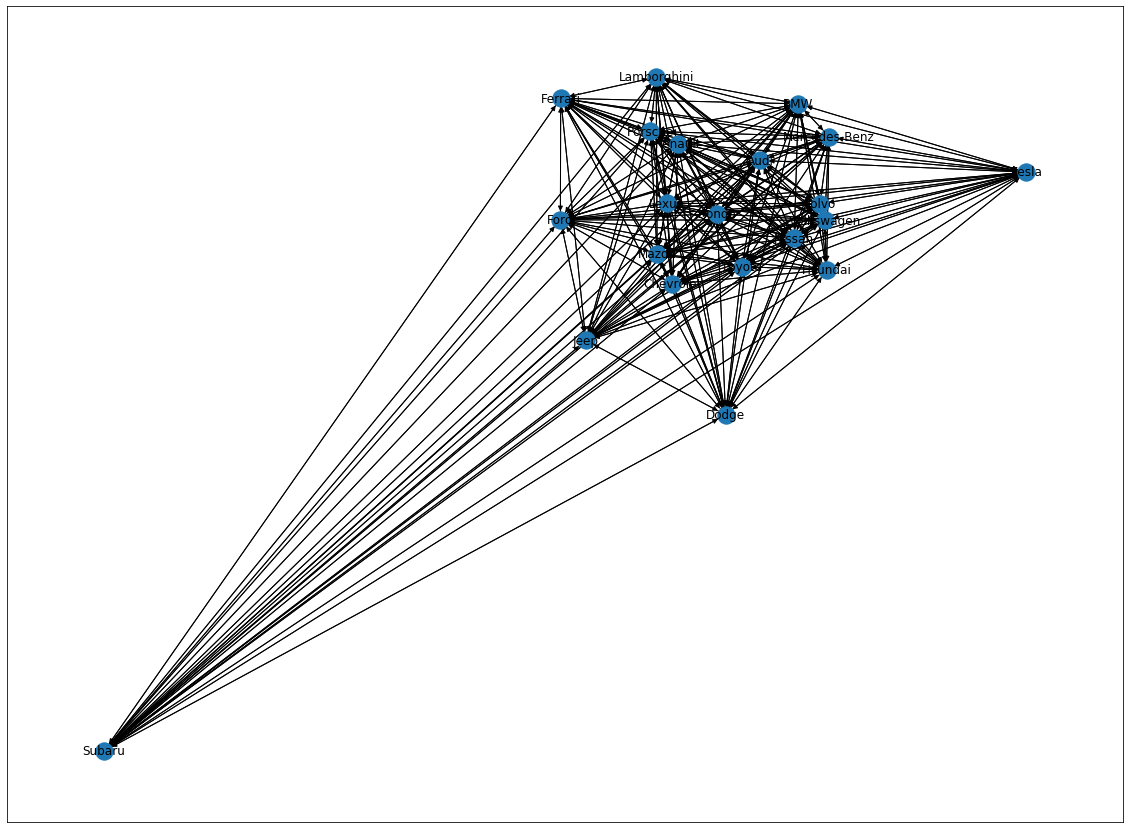

In [53]:
def draw_strongly_connected_network(df):
    G = nx.DiGraph()
    for _, data in df.iterrows():
        G.add_edge(data['brand1'], data['brand2'], weight=data['frq'])
    plt.figure(figsize=(20,15))
    nx.draw_networkx(G)
draw_strongly_connected_network(df)

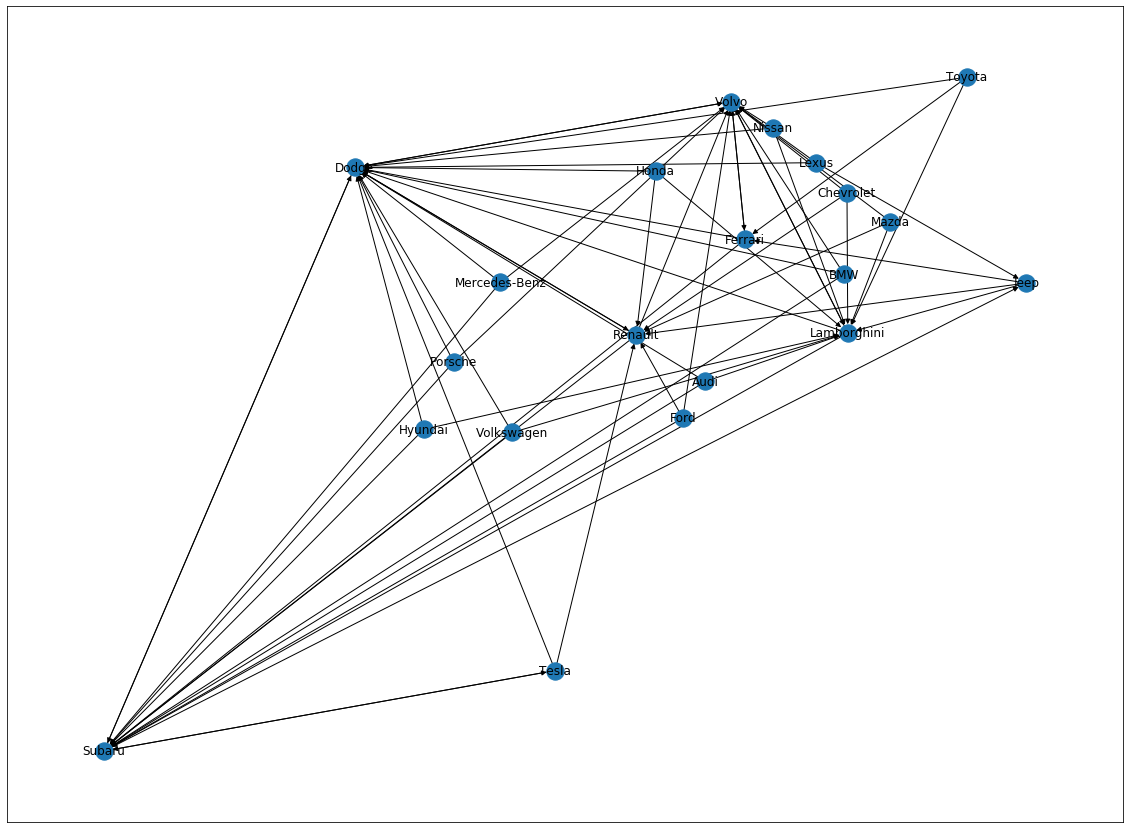

In [51]:
def draw_network_k_closest(df, k):
    G = nx.DiGraph()
    brands = set(df["brand1"].tolist())
    for brand in brands:
        close = k_closest(df, brand, k)
        for _, data in close.iterrows():
            G.add_edge(data['brand1'], data['brand2'], weight=data['frq'])
    plt.figure(figsize=(20,15))
    nx.draw_networkx(G)
draw_network_k_closest(df, 3)       

In [46]:
df[df["brand2"] == "Jeep"]

,Unnamed: 0,brand1,brand2,frq
20,21,Subaru,Jeep,0
40,41,Dodge,Jeep,92
60,61,Tesla,Jeep,23
80,81,Toyota,Jeep,120
100,101,Honda,Jeep,28
120,121,Nissan,Jeep,41
140,141,Chevrolet,Jeep,366
160,161,Hyundai,Jeep,81
180,181,Mazda,Jeep,236
200,201,Renault,Jeep,39
